$\color{green}{\text{This notebook is best viewed in jupyter lab/notebook. You may also choose to use Google Colab but some parts of the images/colouring will not be rendered properly.}}$

# Lab 3 (Weeks 8,9): k-Means Clustering

<div class="alert alert-block alert-warning">

<b>Enter you credentials below</b>

- <b>Student Name:</b> Omar Afifi
- <b>Student ID:</b> 31105327
- <b>Date:</b> 28/04/2024
    

![unsup2.jpg](img/ML.jpg)

## Unsupervised Learning

As the name suggests, unsupervised learning is a type of machine learning in which the training of a model is not supervised using labels of the training dataset. Instead, models themselves attempt to find hidden patterns and insights from the given data. Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning, we have the input data but no corresponding output data (no labels). The goal of unsupervised learning is to find the underlying structure of the dataset, group that data according to similarities, and represent the data in a compressed format.

## Clustering

Clustering is a type of unsupervised learning which involves grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Some examples of popular clustering algorithms are:
- __K-Means Clustering__
- __Mean-Shift Clustering__
- Spectral Clustering
- DBSCAN
- Gaussian Mixture Models (GMM)

In this lab, we will be implementing k-means clustering and mean-shift clustering on the same dataset. 

## K-Means Clustering

K-Means Clustering is one of the simplest unsupervised machine learning algorithms. You will first decide a number *k*, which corresponds to the number of clusters that you desire to have in your dataset. This number will also correspond to the number of centroids. A centroid is the location representing the center of a cluster. Each data point in your dataset is allocated to a specific cluster following a set of rules in an iterative manner. Also, the locations of the centroids are updated subsequently by averaging the data points assigned to the respective cluster. The **‘means’** in the k-Means Clustering refers exactly to this method of updating each cluster centroid.

![kmeans_anim.gif](img/kmeans_anim.gif)

## What you should do in this lab exercise!

In this laboratory exercise, you will create a program that clusters and re-colours each pixel in a provided colour image to **k** mean colours using the k-means clustering algorithm. In all of the tasks below, you may not use any pre-written libraries for k-Means Clustering (e.g. **no** scikit-learn), instead you should use your knowledge of python and numpy to build your own code to perform k-Means Clustering. Your end result of the clustered image should look something like the one shown below.

*Note*: If you cannot see the displayed image '*objective_sharon.jpg*', have a look into the provided '*img*' folder.

![objective_sharon.jpg](img/objective_sharon.jpg)

<div class="alert alert-block alert-warning">
    
You are going to work on the following six tasks throughout this lab. <span style="color:red"> </span>

- **Task 1** : Distance Function
- **Task 2** : k-Means Clustering and visualisation
- **Task 3** : k-Means++ Initialization
- **Task 4** : GMM: Analysing Data Distributions.
- **Task 5** : Mean Shift - Data Modelling via its distribution.
- **Task 6** : Comparison between k-Means, k-Means++ Initialization and Mean-Shift.
    
</div>

In [1]:
# As always, we first import several libraries that will be helpful to solve the tasks
# Important: You are only allowed to use cv2 to import images, but you may NOT use the contained k-means functionality
# For the GMM, you will run through the steps of understanding the model, then use a library to apply it to the same image from the k-means task

import matplotlib.pyplot as plt  
from mpl_toolkits import mplot3d
import numpy as np     
import cv2
import time

from IPython.display import clear_output
from matplotlib.colors import ListedColormap



The following part is to allow interacting with the 3d graph, which makes it easier to judge the actual position of points

In [2]:
pip install ipympl


Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-block alert-info">

## Task 1: Distance function
In this task, you wil build a helper function to compute the squared distance from a set of data points to a set of mean values (*aka* centroids). You are given a small dataset of five data points and two centroids for testing. Using your 'dist2c' function, you will compute distances from each centroid to every data point. Finally, you will visualize your results and check whether your distances are correct by assigning the data points to the closest centroid and displaying the results.
    
</div>

Now, write your own **dist2c** function, which takes a set of data points ('*data*') and a set of means ('*centroids*') and computes the squared distance from each mean to every data point.

In [3]:
def dist2c(data, centroids):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data      : numpy array of size N x d
    #          centroids : numpy array of size c x d
    # Output - dist      : numpy array of size c x N
    # N = the number of data points, c = the number of centroids, d = dimension of data

    ### Insert your solution here ###

    dist = np.dstack((np.sum((data - centroids[0])**2,axis=len(data.shape)-1).reshape(data.shape[0],-1),np.sum((data - centroids[1])**2,axis=len(data.shape)-1).reshape(data.shape[0],-1)))
    
    for centroid in centroids[2::]:
        dist = np.dstack((dist,np.sum((data - centroid)**2,axis=len(data.shape)-1).reshape(data.shape[0],-1)))

    return dist

Now, let's check the function you wrote on the following provided data points.
- X contains five 3-dimensional data points

\begin{equation}
X = 
\begin{bmatrix}
0.67187976 & 0.44254368 & 0.17900127\\
0.55085456 & 0.65891464 & 0.18370379\\
0.79861987 & 0.3439561  & 0.68334744\\
0.36695437 & 0.15391793 & 0.81100023\\
0.22898267 & 0.58062367 & 0.5637733 
\end{bmatrix}
\end{equation}

- M contains two centroids
\begin{equation}
M = 
\begin{bmatrix}
0.66441854 & 0.08332493 & 0.54049661\\
0.05491067 & 0.94606233 & 0.29515262
\end{bmatrix}
\end{equation}

Use your **dist2c** function to compute the distances from each centroid to every data point. Print your results. If you wrote the function correctly, your answer should be close to:

\begin{bmatrix}
0.25977266 & 0.47150141 & 0.10634496 & 0.16664051 & 0.43745224\\
0.64767303 & 0.34083498 & 1.0663305 & 0.99096278 & 0.23600355
\end{bmatrix}

In [4]:
### Insert your solution here ###
X = np.array([[0.67187976, 0.44254368, 0.17900127],
              [0.55085456, 0.65891464, 0.18370379],
              [0.79861987, 0.3439561 , 0.68334744],
              [0.36695437, 0.15391793, 0.81100023],
              [0.22898267, 0.58062367, 0.5637733 ]])

M = np.array([[0.66441854, 0.08332493, 0.54049661],
              [0.05491067, 0.94606233, 0.29515262]])

XMdist = dist2c(X,M)
print(XMdist)

[[[0.25977266 0.64767303]]

 [[0.47150141 0.34083498]]

 [[0.10634496 1.0663305 ]]

 [[0.16664051 0.99096278]]

 [[0.43745224 0.23600355]]]


Write a code to draw a 3D scatter plot assigning each datapoint to its closest centroid using two colors.

*Hint*: Use the '*scatter3D*' function from matplotlib, and choose a different marker (or different marker size) to indicate the cluster centroids.

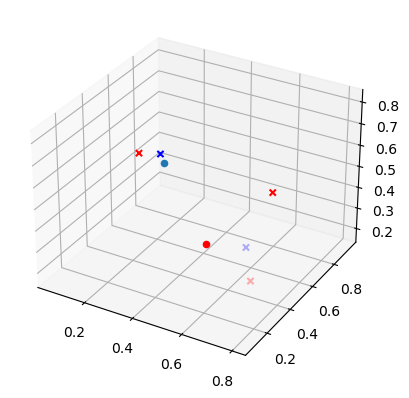

In [5]:
### Insert your solution here ###
#to allow interaction with plot:
#%matplotlib widget 
# Retrieve the closest centroid for each point by using argmin 
classes = np.squeeze(np.argmin(XMdist,axis=-1))
red = X[classes==0]
blue = X[classes==1]
# Create the plot and display the result

ax = plt.axes(projection ="3d")
ax.scatter(red[:,0],red[:,1],red[:,2], color = "red",marker='x')
ax.scatter(M[0,0],M[0,1],M[0,2], color = "red")
ax.scatter(blue[:,0],blue[:,1],blue[:,2], color = "blue",marker='x')
ax.scatter(M[1,0],M[1,1],M[1,2])
plt.show()



<div class="alert alert-block alert-success">
    
#### What do you observe here? Are the data points assigned to their closest centroid?

## the points are assigned to their closest centroid, even if it seems like they should belong to a different group

</div>

<div class="alert alert-block alert-info">

## Task 2: K-means Clustering
In this task, you will implement k-Means Clustering. First, you will write a function to generate random centroids for initialization. Then you will write a function to perform k-Means Clustering (You may want to follow the steps on the lab instructions sheet). Afterwards, you will use these functions to cluster the pixels of the provided *sharon.jpg* image. Finally, you will display the results.    
    
</div>

Write a function **random_centroids**, which takes a dataset and an integer value k (= number of centroids) as inputs, and generates k number of _centroids_ which are randomly sampled from the dataset.

In [6]:
def random_centroids(data, k,unique = 1):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data     : numpy array (N x d)
    #        - k        : an integer value
    # Output - centroids: numpy array (k x d)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###
    if unique:
        c = np.full((k,data.shape[-1]), -1)
        for i,_ in enumerate(c):
            centroid= data[np.random.randint(0,data.shape[0]),np.random.randint(0,data.shape[1])]
            while np.any(np.all(c == centroid,axis = 1)):
                centroid = data[np.random.randint(0,data.shape[0]),np.random.randint(0,data.shape[1])]
            c[i] = centroid
    else:
        c = data[np.random.randint(0,data.shape[0],k),np.random.randint(0,data.shape[1],k)] # Centroids needs to be sampled from the original image (ie. the original data distribution)
    return c

Write a function **mykMeans**, which takes a dataset, an set of k centroids and an integer value T (= number of iterations) as inputs. The function should perform k-Means Clustering on the input dataset by using the input centroids as intilization. After running for T iterations, the function should finally output a cluster index for each data point, the final set of k centroids, and the loss vector containing the k-Means loss at each iteration. (You may want to use your function **dist2c** to compute distances between centroids and data points at each iteration.)

In [7]:
def mykMeans(data, centroids, T):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - centroids   : numpy array (k x d)
    #         - T           : integer
    # Outputs - cluster_idx : numpy array (N,)
    #         - centroids   : numpy array (k x d)
    #         - losses      : list (T)
    # N = number of data points, d = dimension of data, k = number of centroids, T = number of iterations
    

    ### Insert your solution here ###
    if np.max(data)>1:
        data = data/255. #ensure image is normalized
    if np.max(centroids)>1:
        centroids = centroids/255.
    clustered_data = np.zeros(data.shape)
    k = centroids.shape[0] # Number of centroids
    d = dist2c(data, centroids) # Gets the distances between each point to each centroid
    cluster_idx = np.argmin(d,-1) # Retrieve the closest centroid for each point by using argmin
    kMeans_loss = [] # Use the append() method to keep track of the loss values, this is just an empty array for now
    kMeans_loss.append(np.sum(d))
    for _ in range(T):
        
        for i,_ in enumerate(centroids):
            if len(data[cluster_idx==i]!=0):
                centroids[i] = np.mean(data[cluster_idx==i],0)
            clustered_data[cluster_idx==i] = centroids[i]
        d = dist2c(data, centroids)
        cluster_idx = np.argmin(d,-1)
        kMeans_loss.append(np.sum(d))
    centroids = centroids*255.


        
    return cluster_idx, centroids, kMeans_loss, clustered_data

Loading the *sharon.jpg* image and displaying it here.

(256, 256, 3)


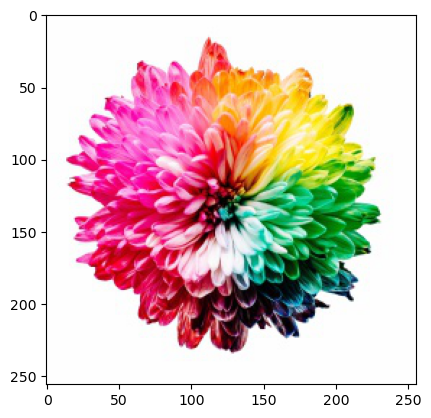

In [8]:
img = cv2.cvtColor(cv2.imread('sharon.jpg'), cv2.COLOR_BGR2RGB)
print(img.shape)

%matplotlib inline
plt.imshow(img, aspect='equal')
plt.show()


Now, use your **random_centroids** function to generate four random centroids. Then, use your **mykMeans** function to cluster the pixels of the *sharon.jpg* image by running it for 20 iterations (T=20). (*Hint*: You may want to reshape your image before applying the **mykMeans** function.) </br> Display the final clustered image. Each pixel should be displayed by the colour of the assigned centroid (i.e. you should only see a total of *k* colours in your clustered image).

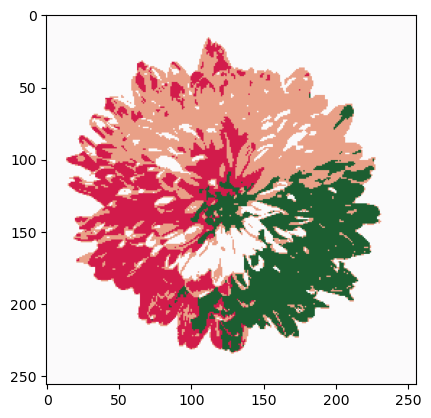

In [9]:
# Define a fixed random seed for repeatability
np.random.seed(17)

### Insert your solution here ###
# Initialize centroids (k=4), perform k-means for 20 iterations and visualise the clustered colour image

# Reshape the image to a 1-dimensional vector and pass it through random_centroid
k =4
centroids = random_centroids(img,k,unique = 1)# the unique flag is to ensure all centroids are unique, which would result in a more colorful image

# Call mykMeans with the relevant variables
T = 20
X_idx, C_new, loss_random,clustered_img = mykMeans(img,centroids,T)

# Plot the result
plt.imshow(clustered_img, aspect='equal')
plt.show()



In [10]:
np.sum(dist2c(img,C_new))/1000000

13012.067568075576

<div class="alert alert-block alert-success">
    
#### Have some fun with your k-Means Clustering impementation! Run the program several times with different random seeds to see if you always converge to the same solution. Try changing k from 4 to other numbers (from 2 to 10) and see how this affects the output and the repeatability of the program. Report and discuss your observations.


## the more the K the more vibrant and colorful the resultant image is, one issue though was when initializing the centroids, if k is large, a large portion of the initialized centroids would be around the white color, which would result in less unique colors

</div>

Now, visualize how the centroids are updated during k-Means Clustering. For that, you should write a code to plot the data points along with the centroids and display both the plot and the clustered image side-by-side. Then, use that function inside your k-Means Clustering implementation to observe how the centroids move with each iteration. 

Write your own function **visualize** which takes the dataset, cluster indices, centroids and sample indices, and generates a figure of two subplots:
1. A 3D scatter plot of the datapoints and centroids.
2. A display of the clustered image

For the 3D scatter plot, the colour of each data point should reflect the colour of the closest centroid (i.e. the centroid which it is assigned to). As it is computationally expensive to plot all the data points at each iteration, you may only draw 250 randomly selected data points (to speed things up).

In [11]:
def visualize(data, cluster_idx, centroids, sample_idx, clustered_data):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - cluster_idx : numpy array (N,)
    #         - centroids   : numpy array (k x d)
    #         - sample_idx  : numpy array (250,)
    # Outputs - figure      : subplot (1, 2)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###

    # Use sample_data and sample_cluster_idx to plot the points and its assigned centroid accordingly
    sample_data = data[sample_idx]
    sampled_cluster_idx = cluster_idx[sample_idx]

    fig = plt.figure(figsize=(12, 4))


    # Create 3D scatter plot with corresponding colours as first sub-plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    for i,centroid in enumerate(centroids):
        ax.scatter3D(centroid[0],centroid[1],centroid[2], color = (centroid[0],centroid[1],centroid[2]))
        points = sample_data[sampled_cluster_idx ==i]
        ax.scatter3D(points[:,0],points[:,1],points[:,2], color = (centroid[0],centroid[1],centroid[2]),marker = 'x')
    #ax.scatter3D(...)

    # Create visualization of the clustered image as second sub-plot
    # It will only contain "k" number of colours in the original image
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(clustered_data)


    # Show both visiualizations, no additional code needed below this
    plt.show()

Now modify your **mykMeans** function and create a new **myKMeans_visualize** function by adding the **visualize** function that you wrote above in order to visualize the results at every iteration. 

Make sure you add a time pause of 1-2 seconds after each iteration so there is enough time for you to observe the convergence of the centroids clearly! *Hint*: the '*time*' library we imported at the beginning provides a '*sleep*' function!

In [12]:
def mykMeans_visualize(data, centroids, T):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - centroids   : numpy array (k x d)
    #         - T           : integer, number of iterations
    # N = number of data points, d = dimension of data, k = number of centroids, T = number of iterations
    

    
    ### Insert your solution here ###
    if np.max(data)>1:
        data = data/255. #ensure image is normalized
    if np.max(centroids)>1:
        centroids = centroids/255.
    clustered_data = np.zeros(data.shape)
    k = centroids.shape[0] # Number of centroids
    d = dist2c(data, centroids) # Gets the distances between each point to each centroid
    cluster_idx = np.argmin(d,-1) # Retrieve the closest centroid for each point by using argmin
    kMeans_loss = [] # Use the append() method to keep track of the loss values, this is just an empty array for now
    kMeans_loss.append(np.sum(d))
    for _ in range(T):
        for i,_ in enumerate(centroids):
            if len(data[cluster_idx==i]!=0):
                centroids[i] = np.mean(data[cluster_idx==i],0)
            clustered_data[cluster_idx==i] = centroids[i]
        d = dist2c(data, centroids)
        cluster_idx = np.argmin(d,-1)
        kMeans_loss.append(np.sum(d))
    
        sample_idx = np.unravel_index(np.random.choice(np.prod(data.shape[0:-1]), size=250, replace=False), data.shape[0:-1])
        
        visualize(data, cluster_idx, centroids, sample_idx, clustered_data)
        time.sleep(1)


    return 

Test your new **myKMeans_visualize** function on the *sharon.jpg* image.

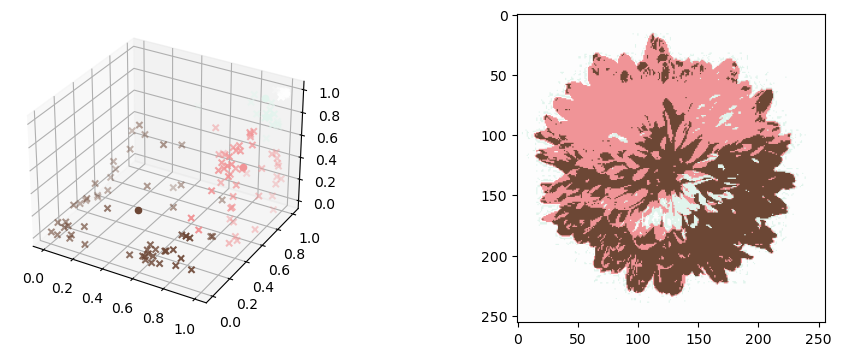

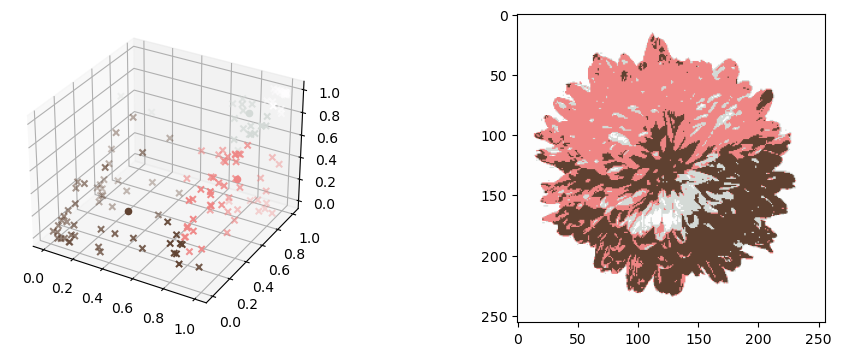

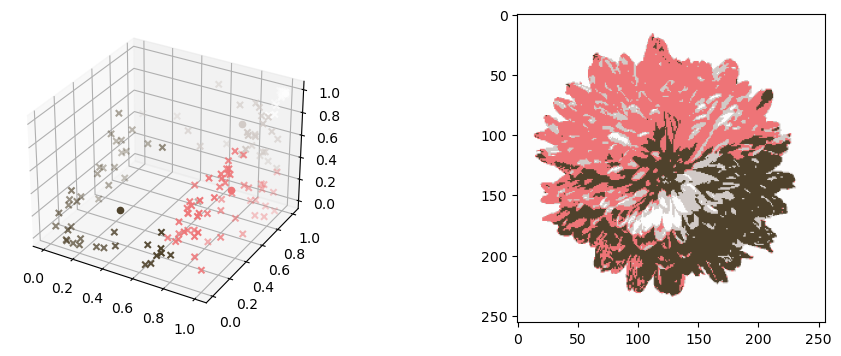

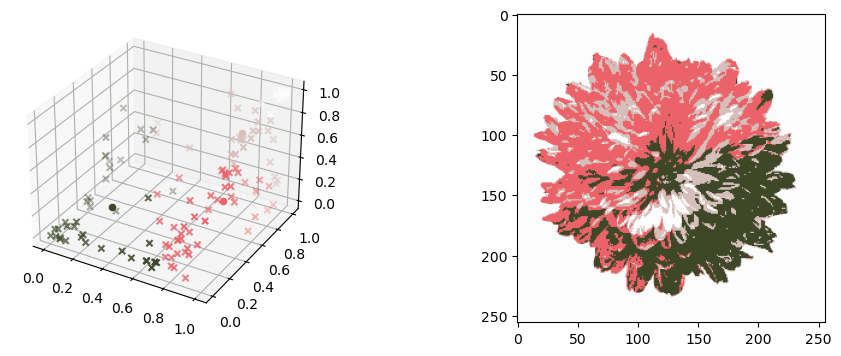

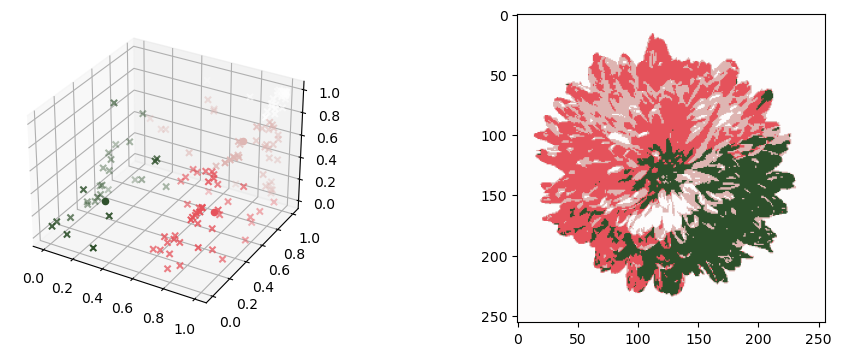

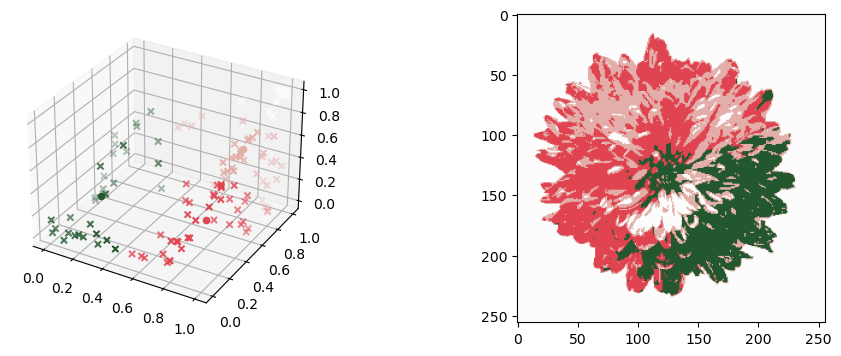

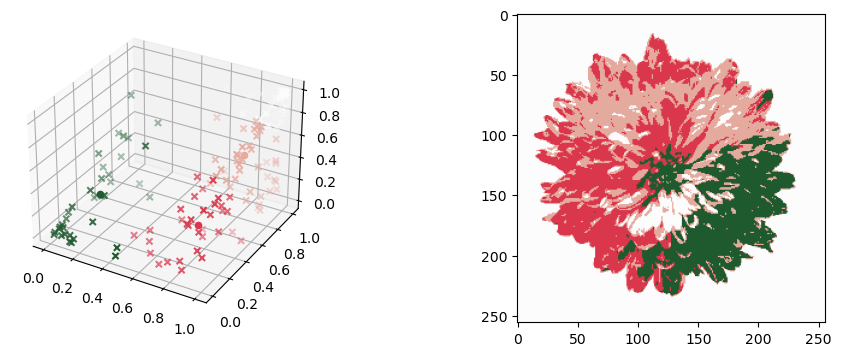

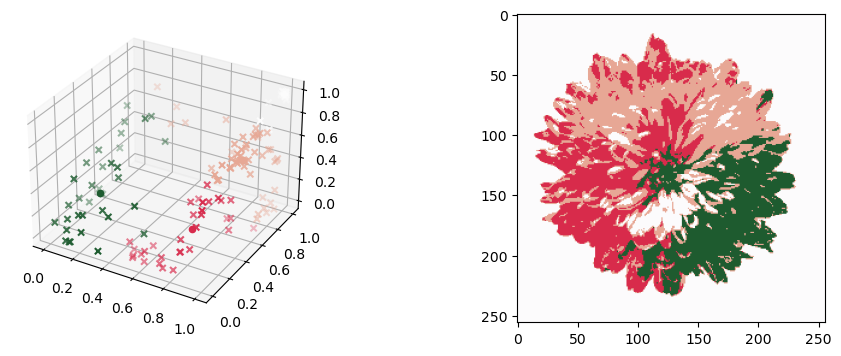

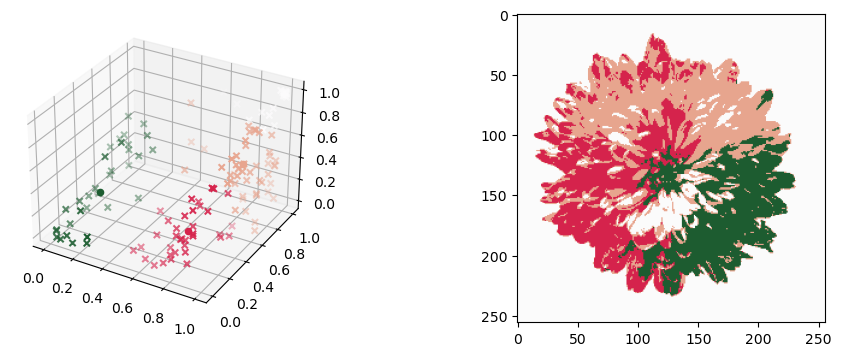

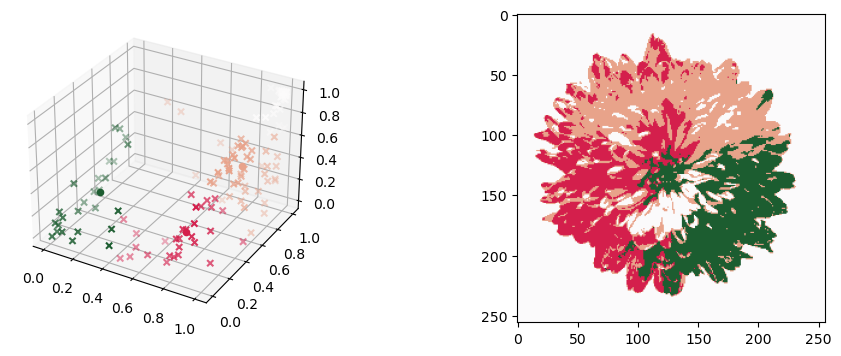

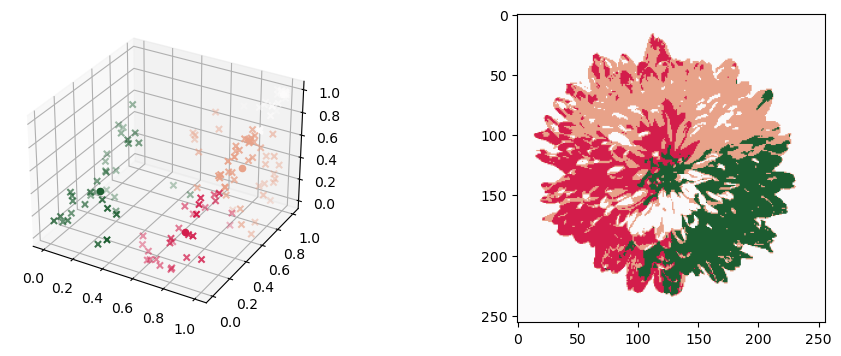

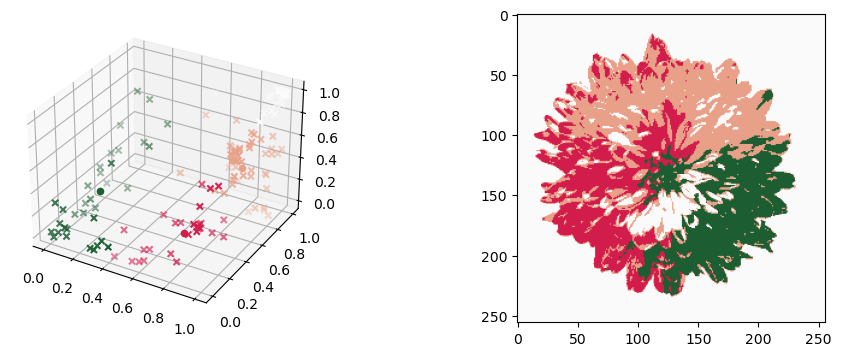

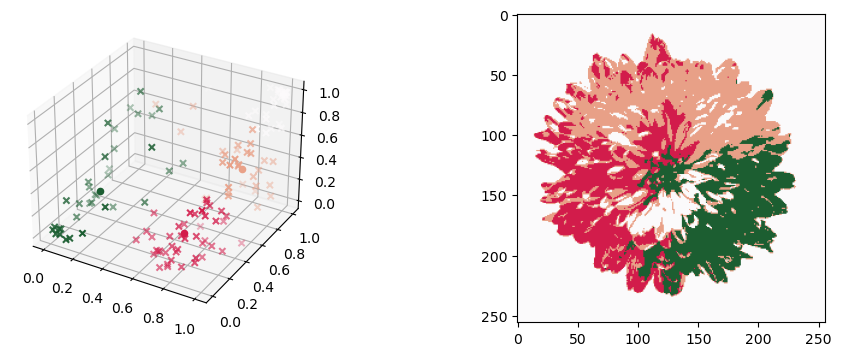

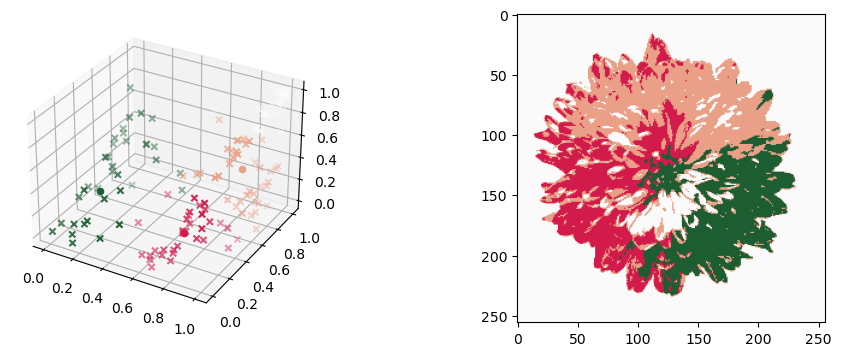

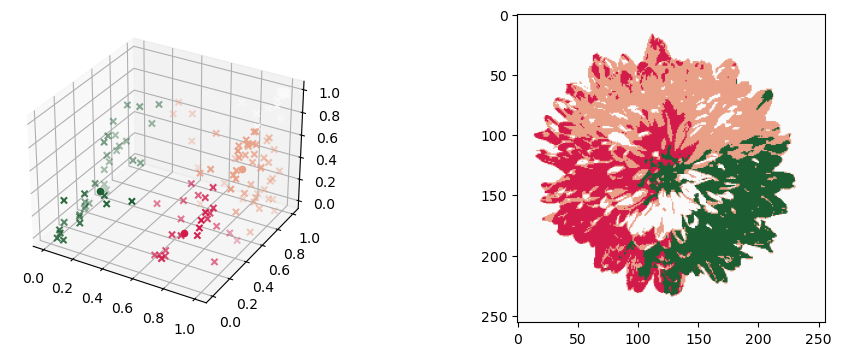

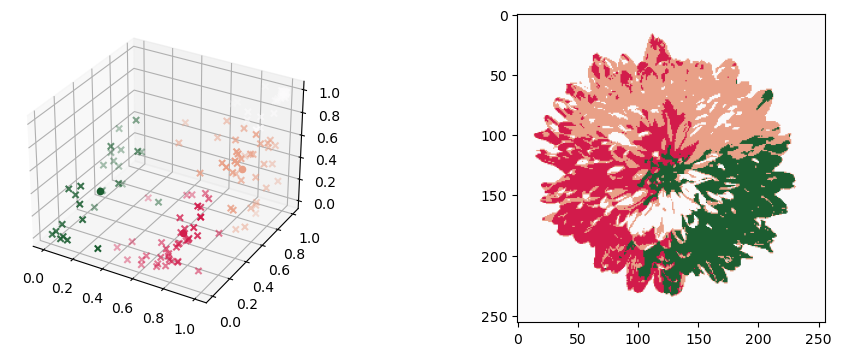

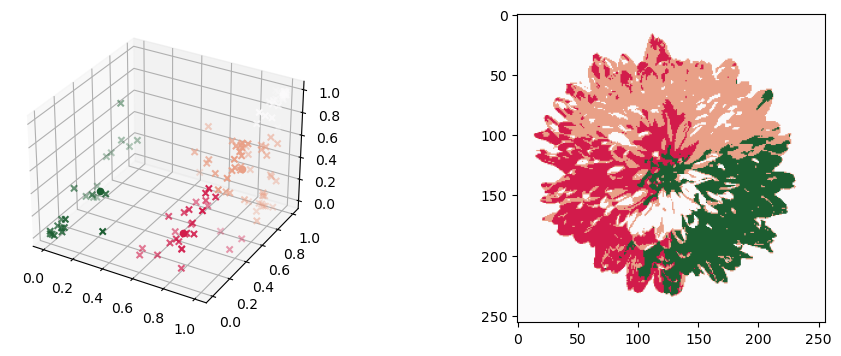

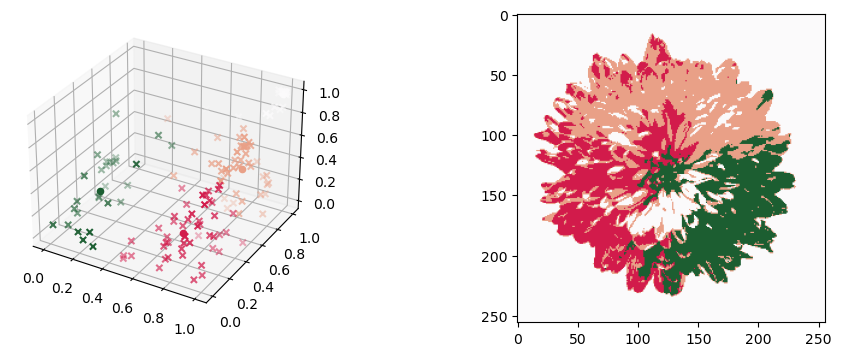

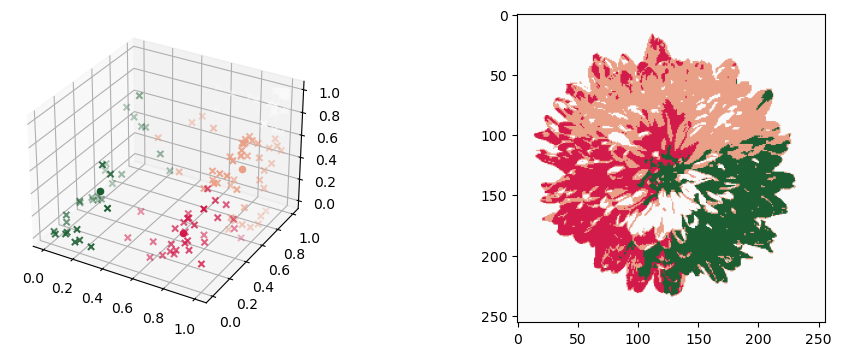

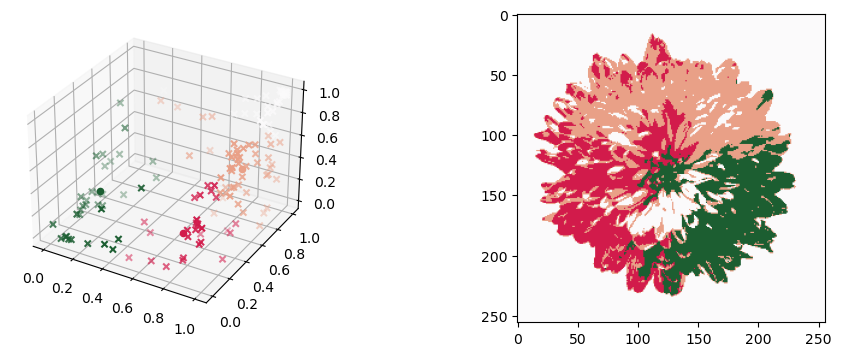

In [13]:
# Specify a random seed (will determine the random initialisation)
np.random.seed(17)

# Initialise your centroids and run your k-Means visualization function
k = 4

C = random_centroids(img,k,unique=1)
#Uncomment to be able to interact wiht the 3d plot
#%matplotlib widget 

mykMeans_visualize(img, C, T)

<div class="alert alert-block alert-success">
    
#### Observe how the centroids move with each iteration. Did you see any pattern in the movement of each centroid? Report and discuss your observations!


## At the start, depending on the initialisation, the centroids start relatively close to each other, which gives a dim image. with each iteration, the centroids seem to diverge away from each other, almost like each centroids picks a corner in the color space

</div>

<div class="alert alert-block alert-info">

## Tasks 3: k-Means++ Initialization
    
In this task, you will implement the k-Means++ initialization of the k-Means Clustering algorithm. First, you will write a function to generate centroids for the initialization using the k-Means++ initialization procedure (You may want to follow the steps on the lab instructions sheet, and read up on the method using the provided reference). 

Then you will use the generated initial centroids together with your previous k-Means Clustering implementation to cluster the pixels of the *sharon.jpg* image. Finally, you will display the results.   
    
</div>

Write a function **kmeanspp_centroids**, which takes a dataset and an integer value k (= number of centroids) as inputs, and generates k centroids following the k-Means++ initilization procedure. You might want to re-use your **dist2c** function here.

In [14]:
def kmeanspp_centroids(data,k): # This is the k-means++ initialisation
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data     : numpy array (N x d)
    #        - k        : an integer value
    # Output - centroids: numpy array (k x d)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###
    N = np.prod(data.shape[0:-1])
    centroids = []
    centroid = data[np.random.randint(0,data.shape[0]),np.random.randint(0,data.shape[1])]
    centroids.append(centroid)
    while len(centroids)<k:
        d = dist2c(img, centroid)
        cluster_d = np.min(d,-1)
        pdf = cluster_d/np.sum(cluster_d)
        cdf = np.cumsum(pdf)
        rand_num = np.random.rand()
        row = int(np.floor((N - sum(cdf>rand_num))/data.shape[0]))
        col = int((N - sum(cdf>rand_num))%data.shape[1])
        centroids.append(data[row,col])

    
    return np.array(centroids)

Now, use your **kmeanspp_centroids** function to generate four random centroids. Then, use your **mykMeans** function to cluster the pixels of the *sharon.jpg* image. (You may want to reshape your image before applying the **mykMeans** function.) Display the final clustered image.

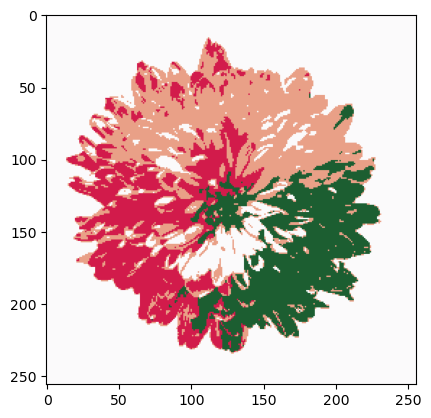

In [15]:
# We first specify our random seed here
np.random.seed(17)

### Insert your solution here ###

# Initialise the centroids with the kmeans++ method, and run the clustering
C = kmeanspp_centroids(img,k)
X_idx, C_new, loss_kmeanspp,clustered_img = mykMeans(img,C,T)

# Display your results (image)
plt.imshow(clustered_img, aspect='equal')
plt.show()

In [16]:
np.sum(dist2c(img,C_new))/1000000

13012.338275929525

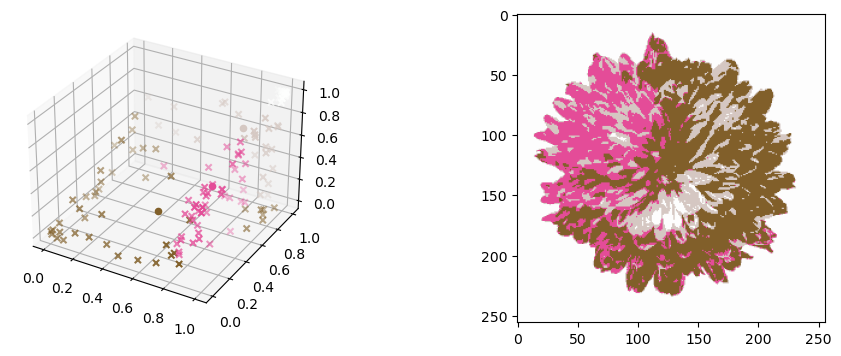

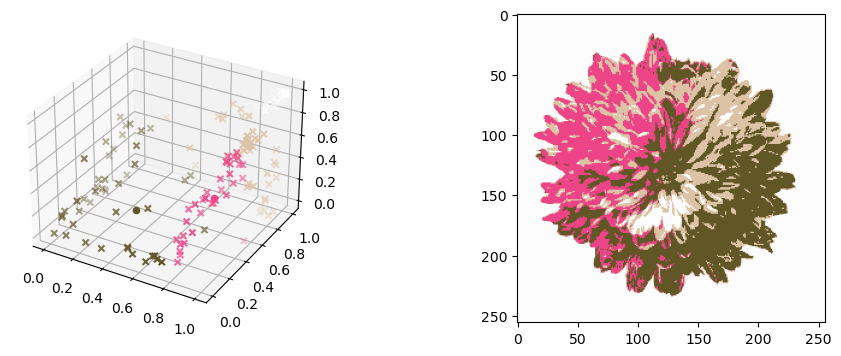

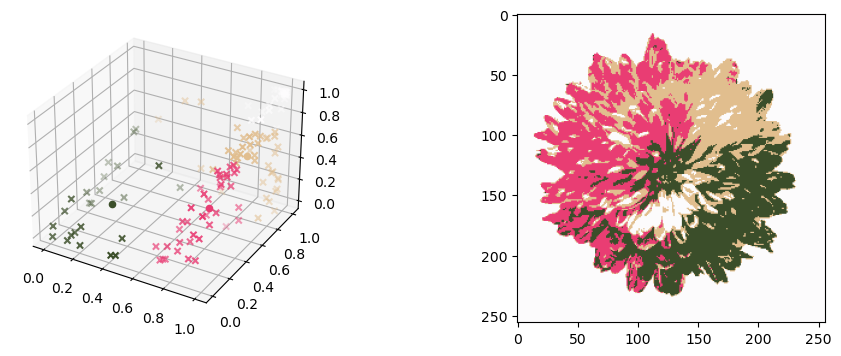

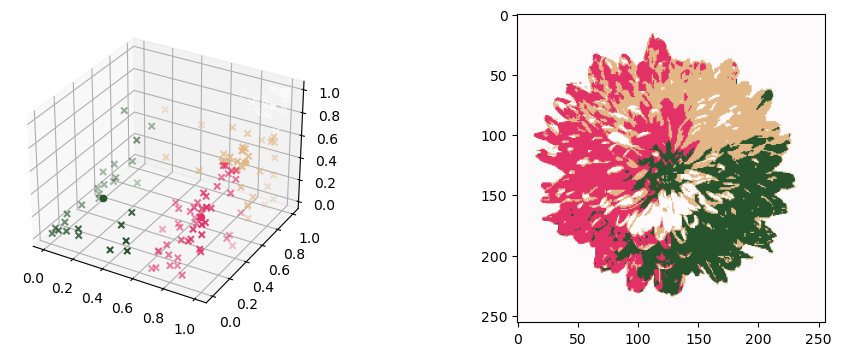

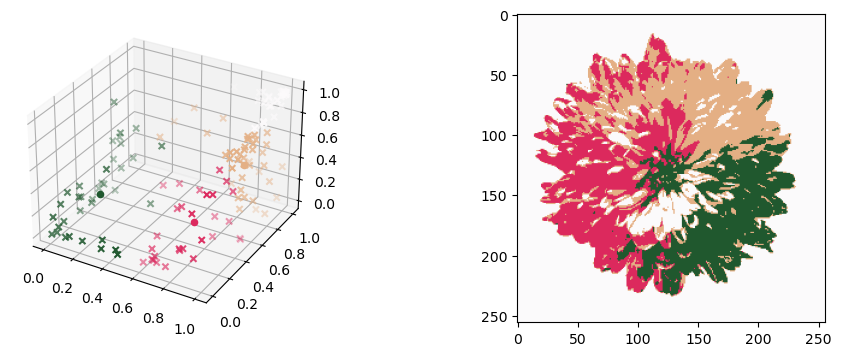

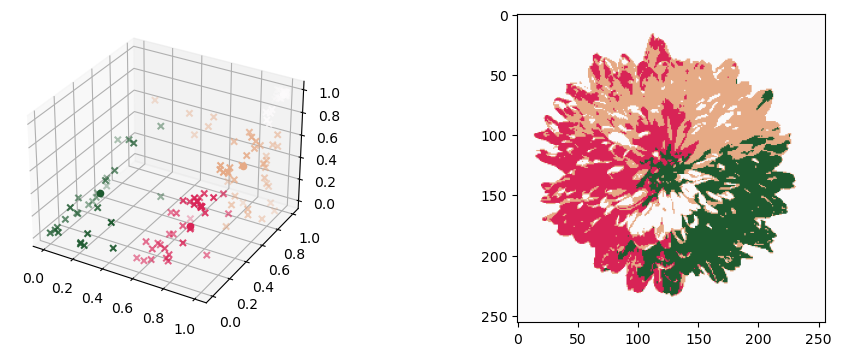

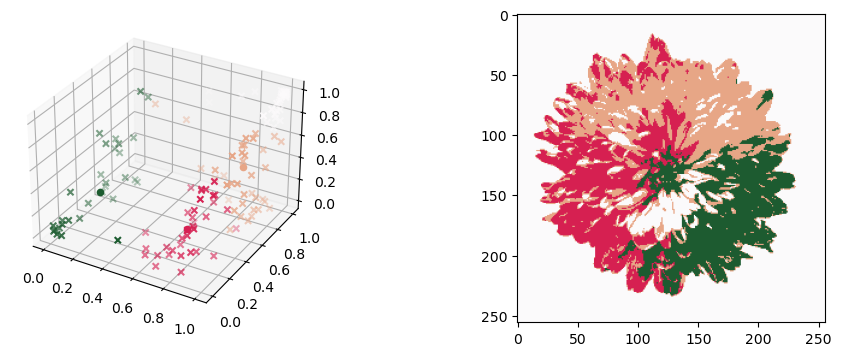

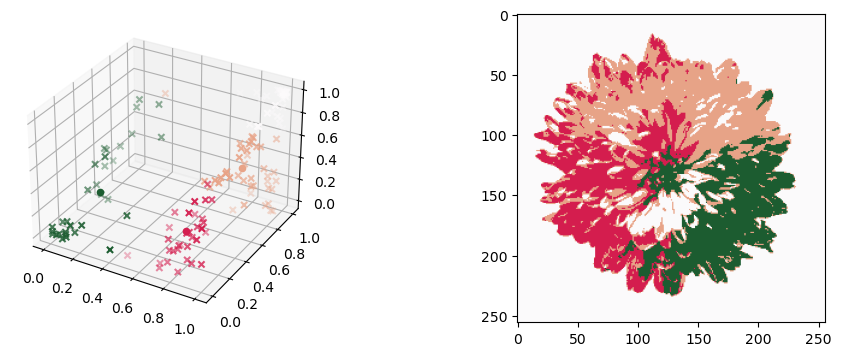

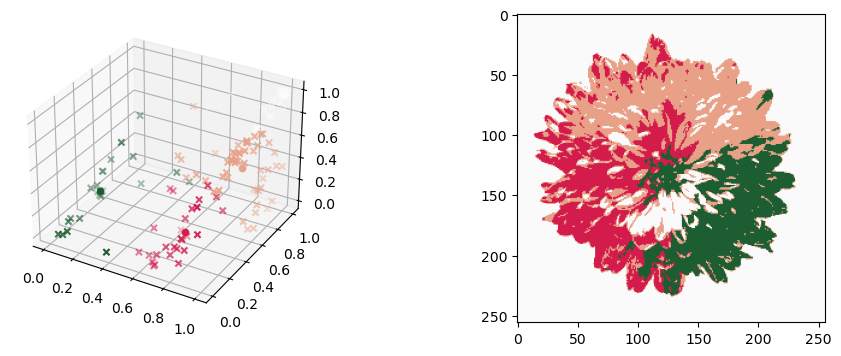

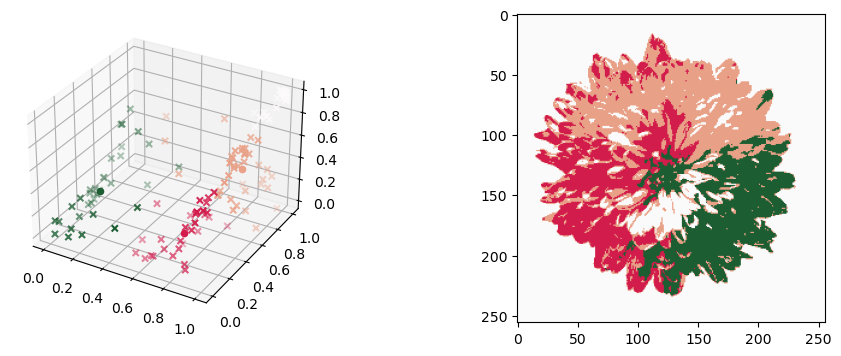

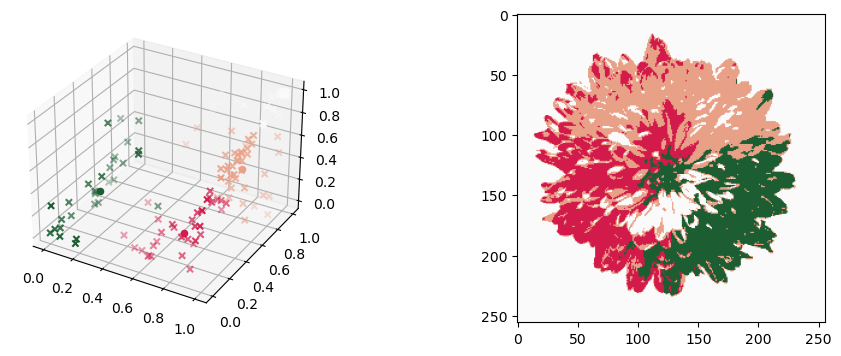

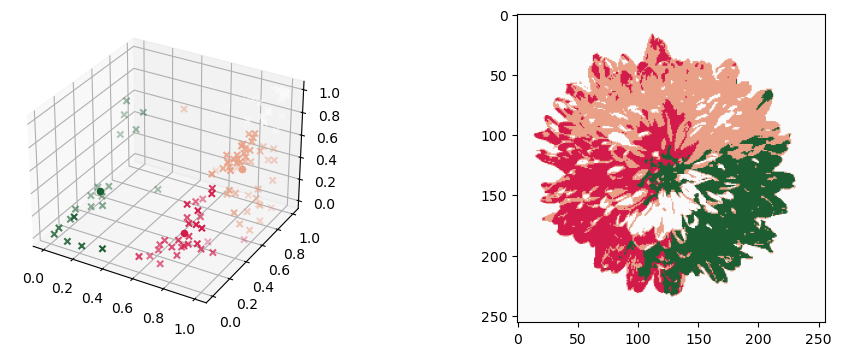

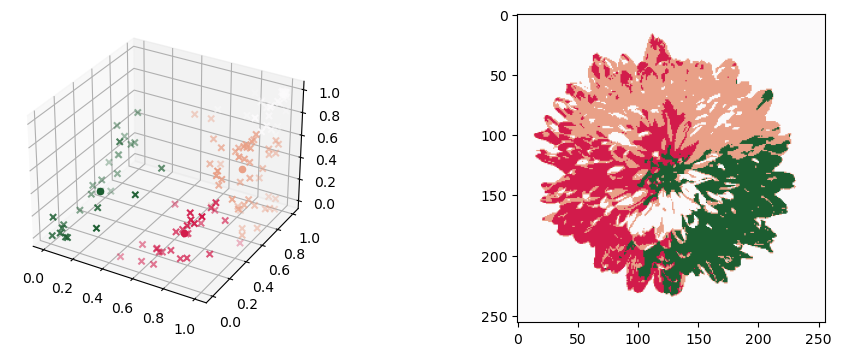

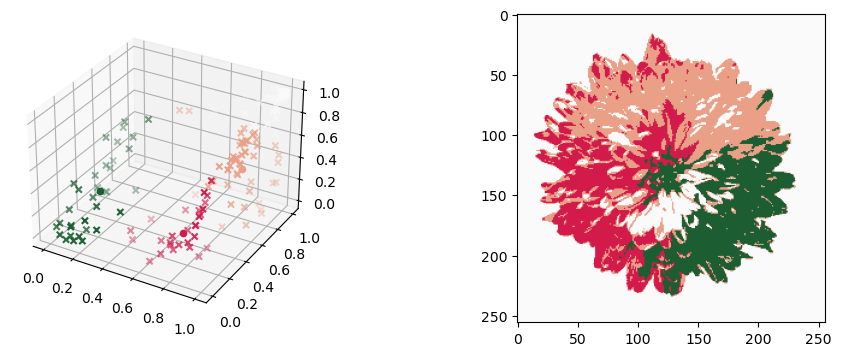

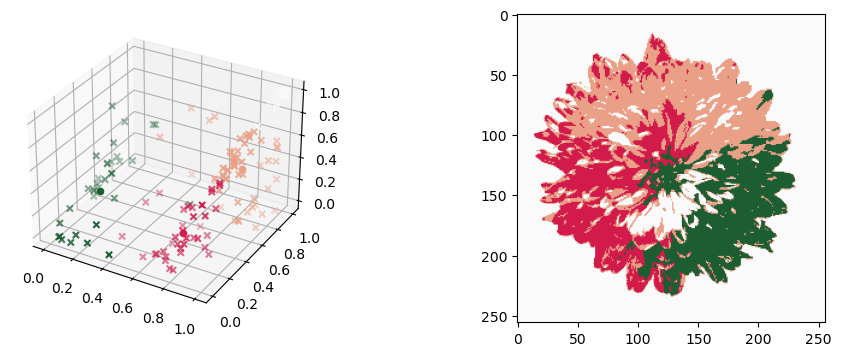

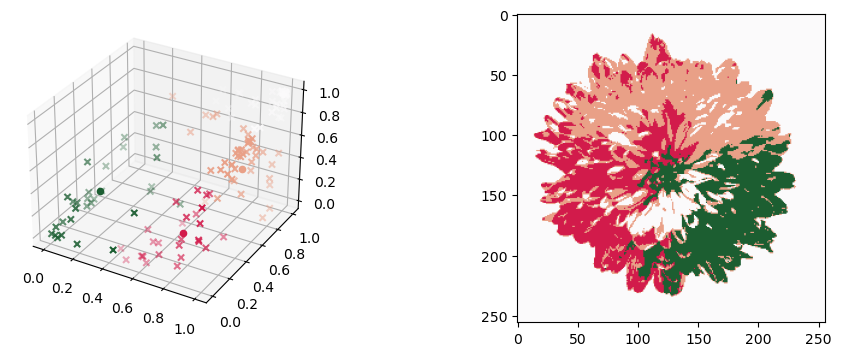

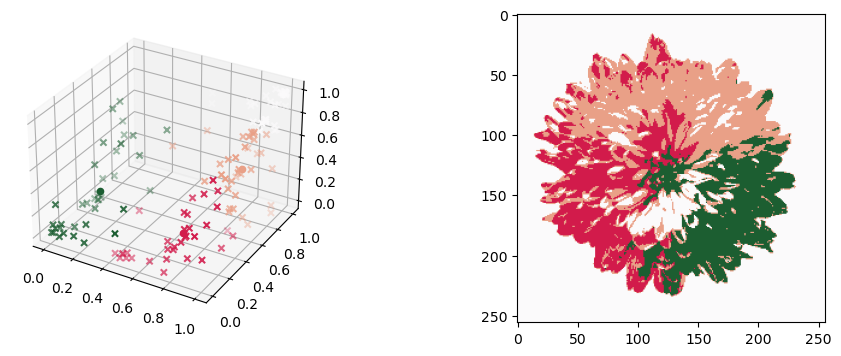

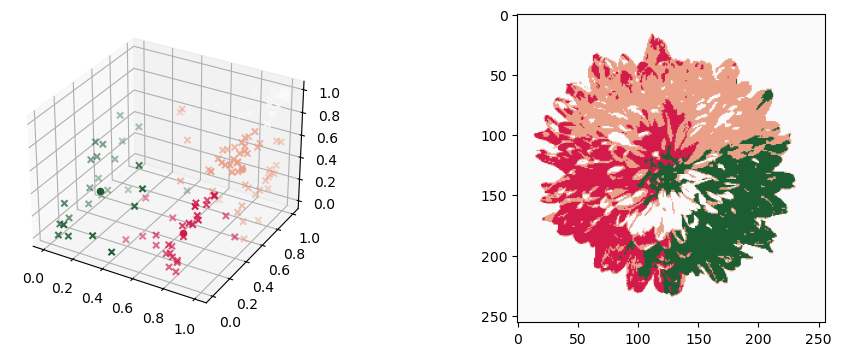

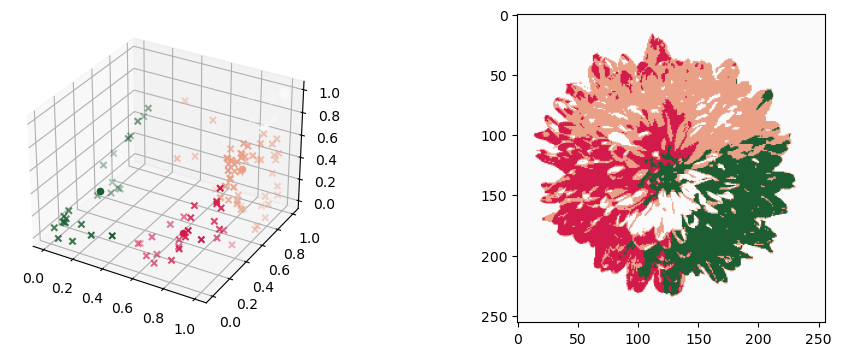

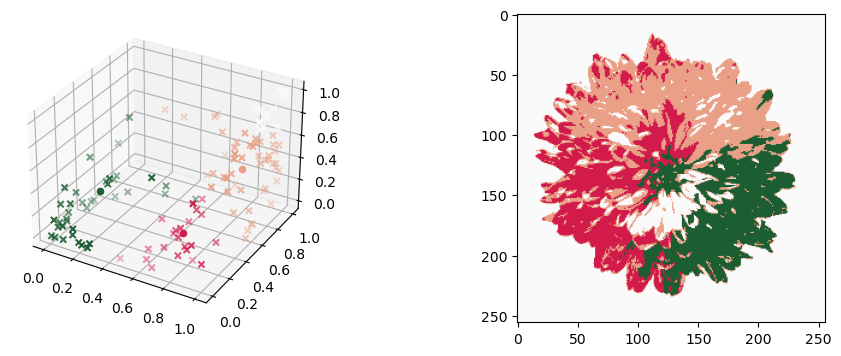

In [18]:
#%matplotlib widget 
mykMeans_visualize(img, C, T)

<div class="alert alert-block alert-success">
    
#### Were you able to obtain the same results (the same clustered sharon image) as you did with the random initialization, or do they differ significantly? Were you able to obtain the results faster than with the random initialization? Report your findings, and explain why you think this happens!

## The final result is the same, however, the initial image was much closer to the final image, than it was with the random initialisation. this lead to converging to the final image much faster compared with the previous approach. This happens due to the initialisation algorithm we use, as we discourage centorid initialisation that have a small distance to any of the other initialised centroids. this results in a more vibrant initial image. And as we saw in the previous part that the centroids tend to get further away from each other with each iteration, with the k-means++ approach, the centroids start off already relatively far away.

</div>

Now, plot the loss of the two k-Means Clustering methods over the number of iterations. You may want plot the loss curves of the two methods in the same plot for convenience of comparison, and make sure to add an appropriate legend.

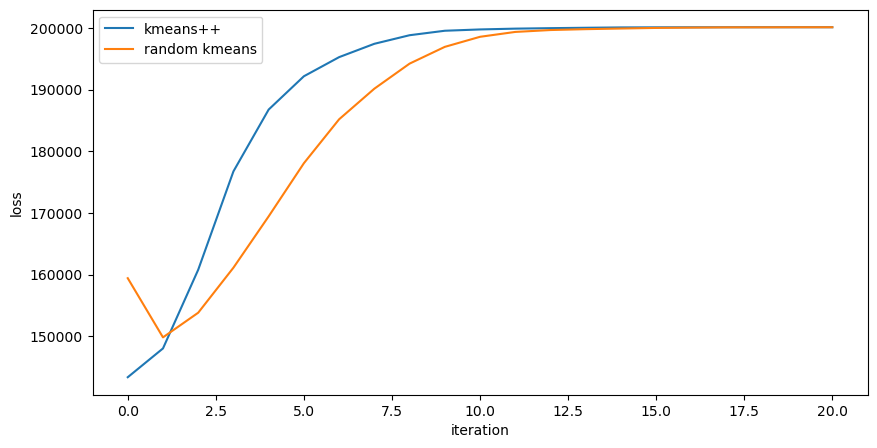

In [23]:
### Insert your solution here ###

# Display your losses for the random initialization vs. the kmeans++ initialization
fig = plt.figure(figsize=(10, 5))

plt.plot(loss_kmeanspp,)
plt.plot(loss_random)
plt.legend(['kmeans++','random kmeans'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show() 


<div class="alert alert-block alert-success">
    
    
    
#### From your results, discuss the main differences between random initialization and k-Means++ initialization. What do you notice regarding the position of the initial centroids? Which one do you think is better, and why? What do you observe regarding the loss and convergence of both methods? Discuss the pros and cons of the two methods.

## the location of the initila centroids of the kmeans ++ method is better as it has less loss. Similarly, the k means++ method converges faster as seen in the graph


</div>

<div class="alert alert-block alert-info">
    
## Tasks 4: GMM: Analysing Data Distributions.
    
In this task, we will learn about how data can be modelled via its distribution. We first start with a toy example, which helps us understand the concepts.
    
    
</div>

### Think about your data like a pro!
You can think of any data sample as a random vector sampled from a distribution that is usually super complicated to model analytically. Nevertheless, there are various methods to estimate the distribution of data. 

Let us first look at an intuitive way of thinking about this. Consider a set of images of size $100 \times 100$ representing face images. You can think of any $100 \times 100$ data sample as a $10,000$D random vector sampled from a distribution that we do not know. If you have an image, where you put a mouth on the forehead, this impossible image has a very low-likelihood to be generated from the distribution that YOU DO NOT KNOW. However, a regular image from say your favorite artist has a reasonable likelihood to be generated from that distribution. 

We can think about data as a random process that provides us with new tools and algorithms to analyze it. 

### The game begins

OK, let us start with a toy example. We assume that our data can be modeled using a GMM with the following parameters:

\begin{align}
    &\mu_1 = -1, \quad \mu_2 = 0, \quad \mu_3 = 0.5, \quad \mu_4 = 2 \;.\\
    &\sigma_1 = 1.0, \quad \sigma_2 = 2.0, \quad \sigma_3 = 3.0, \quad \sigma_4 = 1.0\;.\\
    &\omega_1 = 0.6, \quad \omega_2 = 0.1, \quad \omega_3 = 0.1, \quad \omega_4 =  0.2\;.\\
\end{align}

We pretend that we do not know this is the case and will try below to estimate this distribution. But let's first take a closer look at the GMM itself.

In [ ]:
### Insert your solution here (use numpy arrays to define the provided parameters) ###
means = np.array([-1, 0, 0.5, 2])
stds = np.array([1, 2, 3, 1])
weights = np.array([0.6, 0.1, 0.1, 0.2])

### Plot the pdf of a GMM

Recall that a Gaussian distribution is defined as

\begin{align}
    \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big)}\;.
\end{align}

The pdf of a GMM with $k$ components is 



\begin{align}
    f({x}) &= \sum_{i=1}^k 
    \omega_i \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i) \;.
\end{align}

Here, ${x} \in \mathbb{R}$ (in our case) is the sample we evaluate the pdf at, $\omega_i$ is the weight (i.e., mixing coefficient) of the $i$-th Gaussian component, $\boldsymbol{\mu}_i$ is the mean vector of the $i$-th Gaussian component, and $\boldsymbol{\Sigma}_i$ is the covariance matrix of the $i$-th Gaussian component. The symbol $\mathcal{N}(\cdot|\boldsymbol{\mu}_i,\boldsymbol{\Sigma}_i)$ denotes the probability density function of a multivariate Gaussian distribution with mean vector $\boldsymbol{\mu}_i$ and covariance matrix $\boldsymbol{\Sigma}_i$. 

Now, below write a code to plot the pdf of the GMM described above between [-10,10]. If your code is correct, you should see the distribution.

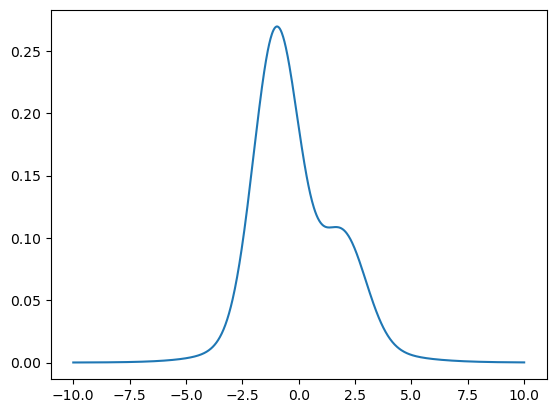

In [ ]:
def normal_pdf(x , mean , sd):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - x : numpy array of linearly spaced points (N x 1)
    #        - mean : an integer value
    #        - sd: an integer value
    # Output - prob_density : a numpy array of probability densities
    
    ### Insert your solution here ###
    
    prob_density = 1/np.sqrt(2*np.pi*sd**2)*np.exp(-1*((x-mean)**2)/(2*sd**2)) 



    return prob_density

# we know the GMM, so plot the PDF of it
# Do this by creating some points in between -10 and 10 via linspace
X_range = -10
X0 = np.linspace(-X_range, X_range, 1000).reshape(-1,1)
Z0 = np.zeros_like(X0) # Creates a tensor with identical properties as shape as X0

# Then calculate the likelihood (probabilities) of each point.
# Hint: Look at the formulas above for information how to 'compose' the overall pdf using the components of the mixture.

for i,weight in enumerate(weights):
    Z0 = Z0 + weight*normal_pdf(X0,means[i],stds[i])


plt.plot(X0,Z0)


### Next stop: Sampling from a GMM!

If we have a GMM, to draw samples from it, we can do the following:

1) First, sample from the components according to their weights using the random.choice function from the numpy package.
2) Then, sample from a normal distribution based on the chosen component and according to the parameters of the normal distribution.

Study the code below and convince yourself that what it does is to generate 1,000 samples from the GMM. 

In [ ]:
num_samples = 1000

chosen_comp = np.random.choice(a=means.shape[0], size=num_samples, p=weights)

X = np.random.normal(loc=means[chosen_comp], scale=stds[chosen_comp], size=num_samples).reshape(-1,1)

### Hold on, what is a pdf?

<div class="alert alert-block alert-success">
    
#### Note that in the majority of cases we just have raw data and we do not know the pdf, so check the following figure and explain what it shows.

## the graph shows the distribution of data points (red dots) as well as the pdf representing such distribution, which is GMM

</div>

_Note_: If you cannot see the displayed image 'Task4_GMM_01_what_is_a_pdf.png', have a look into the provided 'img' folder.

![Task4_GMM_01_what_is_a_pdf.png](img/Task4_GMM_01_what_is_a_pdf.png)

### Can we estimate the pdf from data? 

Yes, you can use a GMM to estimate the pdf or you can use a technique called the "Kernel Density Estimation" or KDE to estimate an arbitrary pdf. Check out the following code snippet and explain what you understand from the code below. Also, check the [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation) on wiki and learn about the algorithm (you can skip how the bandwidth can be set automatically if you want to)

<div class="alert alert-block alert-success">
    
#### Check out the following code snippet and use your newly acquired knowledge about KDE to explain what you understand from the code below. Also take a look at the plot and explain what you see.

## Using our X which represents our pdf, the code tries to fit a pdf using the epanechnikov method. This is counterintuitive, since the graph shows that they are different. the reason for that is the number of samples we are using to represent our pdf. if we pick X such that it has a large number of points, the two graphs below should converge and become the same

</div>

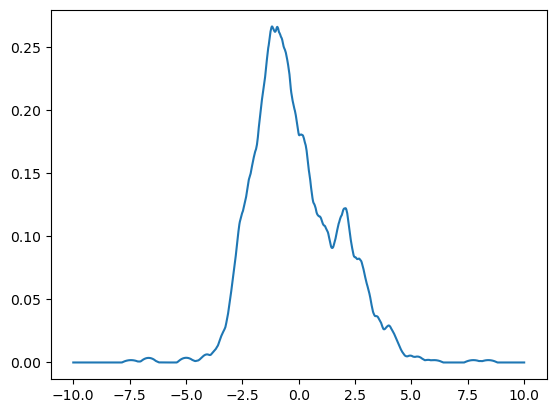

In [ ]:
from sklearn.neighbors import KernelDensity

# There is no free-lunch. If you want to use a KDE, you need to identify appropriate hyper-parameters of 
# the algorithm, here a kernel and its parameters. We will use the Epanechnikov kernel with a bandwidth of 0.4. 
# Feel free to try other values.

kde = KernelDensity(kernel='epanechnikov', bandwidth=0.4).fit(X)

X0 = np.linspace(10, -10, 1000).reshape(-1,1)

Z0_kde = np.exp(kde.score_samples(X0))
plt.plot(X0,Z0_kde)

_Note_: If you cannot see the displayed image 'Task4_GMM_02_kde.png', have a look into the provided 'img' folder. The kde-results are displayed in purple colour.

![Task4_GMM_02_kde.png](img/Task4_GMM_02_kde.png)

<div class="alert alert-block alert-info">
    
## Tasks 5: Mean Shift - Data Modelling via its distribution.
    
In this task, you will apply the concepts learned above for using the [mean shift algorithm](https://ieeexplore.ieee.org/document/1000236) 
 for image segmentation.
    
    
</div>

### Drumroll, here comes the Mean Shift 🐸

The [Mean Shift (MS)](https://en.wikipedia.org/wiki/Mean_shift) algorithm is a simple algorithm to find the mode of a distribution (what is the mode of a distribution? -> Make sure to look it up if you do not already know). The algorithm is iterative and employs a kernel function to find the modes from samples of a distribution. Let $k(x,z)$ be a kernel function, measuring the similarity between $x$ and $z$ (ie., the higher $k(x,z)$, the more similar are $x$ and $z$). Then using $k(x,z)$, we iterate over

\begin{align}
    m \gets \frac{ \sum_{x_i} k(x_i,m) x_i}{\sum_{x_i} k(x_i,m)} \;.
\end{align}
 
Then $m$ will be a mode of the distribution where $x_i$ are sampled from. Below, you will develop a simplified version of this algorithm using the so called _flat kernel_

\begin{align}
k_{\text{flat}}(x,z) = 
    \begin{cases}
    1 &\text{if} \;\; \|x-z\|^2 \leq h^2\\
    0 &\text{otherwise} 
    \end{cases}
\;.
\end{align}

A few comments:
1. $h$ is a hyperparameter of this kernel (we call it the bandwidth of the kernel) and you need to set it properly for the algorithm to work.
2. What this kernel does is simple, if the distance between $x$ and $z$ is less than $h$, then their similarity is considered to be 1, otherwise the similarity between $x$ and $z$ is zero.

_Note_: Make sure to re-use your code from Task 1 to compute the squared distances you need within the kernels to save some implementation time.

In [ ]:
# Implement flat kernel

def flat_kernel(centers, X, bandwidth=0.1):
    
    # The inputs and the outputs of your function should be as follows:
    # Inputs - centers : the means (k x 1 numpy array), where k is the number of centres
    #        - X : samples (i x 1 numpy array), where i is the number of samples
    #        - bandwidth : an integer value representing "h" in the equation
    # Output - K : the kernel output for each distance from the means
    

    num_centers = centers.shape[0]
    num_samples = X.shape[0]

    K = np.zeros((num_samples, num_centers))
    ### Insert your solution here ###
    
    # Call dist2c function to complete part of equation (1)
    d = dist2c(X,centers)
    K = d <= bandwidth**2

    for i,_ in enumerate(centers):
        if np.sum(K[...,i])!=0:
            centers[i] = np.sum(K[...,i]*X)/np.sum(K[...,i])
        


    # Make sure the shapes are compatible between dist and "K" and complete the remaining equation (1)


    return centers

## Playing with the Mean Shift algorithm - your turn!

1. Write the code to perform the mean shift iterations on the data $X$ from the previous task. We will try 100 iterations for this example.
2. Using samples from the GMM, and starting from $m=5$, what will be the mode of the distribution?
3. Now start from $m=-5$. What mode do you converge to new? Do you think MS works on our toy data? 
4. Visualise the results for both cases (starting from $m=5$ and  $m=-5$) by showing the respective starting point and result after convergence plotted on top of the data $X$. </br> _Note_: Take a look at the function 'axvline' to use a vertical line for visualising the mode after convergence.

_Hint_: To increase efficiency, you can perform steps 2. and 3. in one go.

In [ ]:
# provided starting points:
centers = np.array([[-5],[5]])


num_centers = centers.shape[0]

max_iter = 100 # Number of iterations for the mean shift algorithm

centers_trajectory = []
for i in range(max_iter):

    centers_trajectory.append(centers.copy())
    new_c = flat_kernel(centers, X, bandwidth=0.33)

    for j in range(num_centers):
        centers[j] = new_c[j]


centers_trajectory = np.array(centers_trajectory).transpose().reshape(2,-1)



Plot the starting points(s), the calculated modes and the PDF. Use different colours for the two cases to better interpret the results.

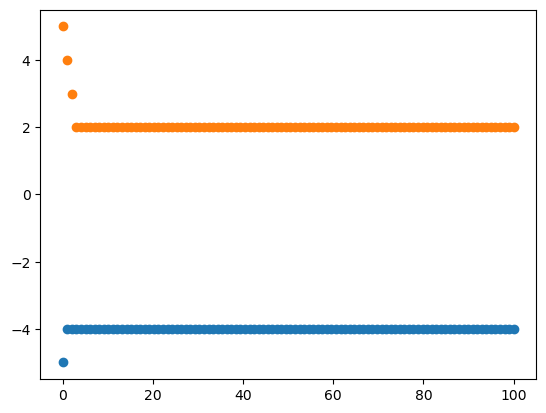

In [ ]:
### Insert your solution here ###
plt.scatter(np.linspace(0,max_iter,max_iter),centers_trajectory[0,:])
plt.scatter(np.linspace(0,max_iter,max_iter),centers_trajectory[1,:])

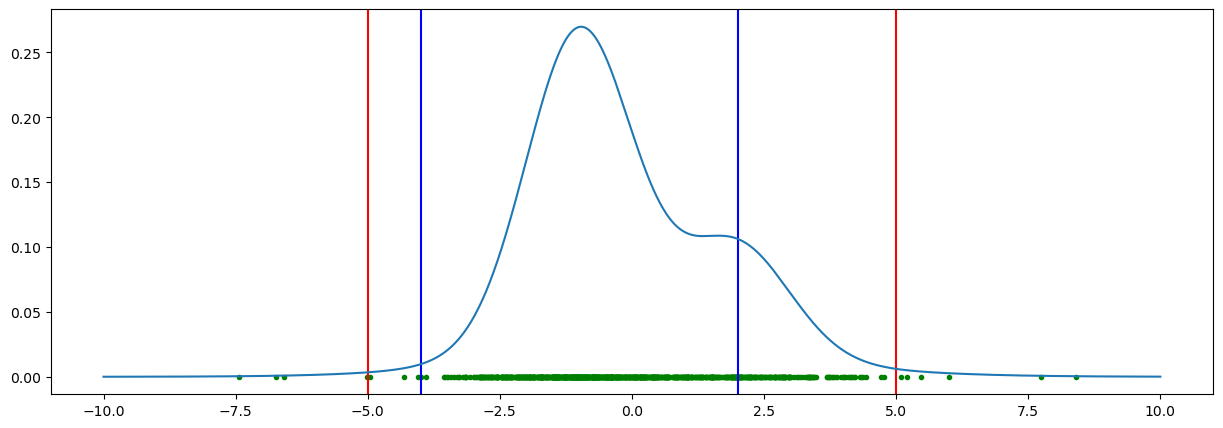

In [ ]:
X = np.sort(X)
plt.figure(figsize=(15,5))
plt.scatter(X,np.linspace(0,0,len(X)),marker=".",color = 'g')
for center in centers_trajectory:
    plt.axvline(center[0],color = 'r')
    plt.axvline(center[-1], color = 'b')
plt.plot(X0,Z0)

## From flat kernel to Epanechnikov

The Epanechnikov kernel is a popular kernel used in the mean shift algorithm. It is defined as:

\begin{align} 
    K(x,z) = 
    \begin{cases} 
        \frac{3}{4} \Big(1 - \frac{\|x - z\|^2}{h^2} \Big) &\text{if } \|x - z\|^2 \leq h^2\;, \\ 
        0 &\text{otherwise} 
    \end{cases} 
\end{align}


The Epanechnikov kernel is a popular choice for the MS algorithm. It has a bounded support, with a flatter shape (compared to a Gaussian kernel), making it less sensitive to outliers.

- Implement the Epanechnikov kernel and repeat the above task with this kernel instead of the flat kernel:

1. Implement meanshift iterations.
2. using samples from the GMM, and starting from $m=5$, what will be mode of the distribution?
3. Now start from $m=-5$. Do you think MS works on our toy data? 

In [ ]:
def epanechnikov_kernel(centers, X, bandwidth=0.1):
    
    # The inputs and the outputs of your function should be as follows:
    # Inputs - centers : the means (m x 1 numpy array), where m is the number of centres
    #        - X : samples (i x 1 numpy array), where i is the number of samples
    #        - bandwidth : an integer value representing "h" in the equation
    # Output - k : the kernel output for each distance from the means
    
    ### Insert your solution here ###

    # Again, you can use the dist2c function
    
    num_centers = centers.shape[0]
    num_samples = X.shape[0]

    K = np.zeros((num_samples, num_centers))
    ### Insert your solution here ###
    
    # Call dist2c function to complete part of equation (1)
    d = dist2c(X,centers)
    con = d <= bandwidth**2
    K = 3/4*(1-(d/bandwidth**2))*con

    for i,_ in enumerate(centers):
        if np.sum(K[...,i])!=0:
            centers[i] = np.sum(K[...,i]*X)/np.sum(K[...,i])
    
    return centers

In [ ]:
   
### Insert your solution here ###
max_iter = 100 # Number of iterations for the meanshift algorithm

centers = np.array([[5],[-5]])
centers_trajectory = []

for i in range(max_iter):

    centers_trajectory.append(centers.copy())
    new_c = epanechnikov_kernel(centers, X, bandwidth=0.47)

    for j in range(num_centers):
        centers[j] = new_c[j]


centers_trajectory = np.array(centers_trajectory).transpose().reshape(2,-1)




Plot the starting points(s), the calculated modes and the PDF. Use different colours for the two cases to better interpret the results.

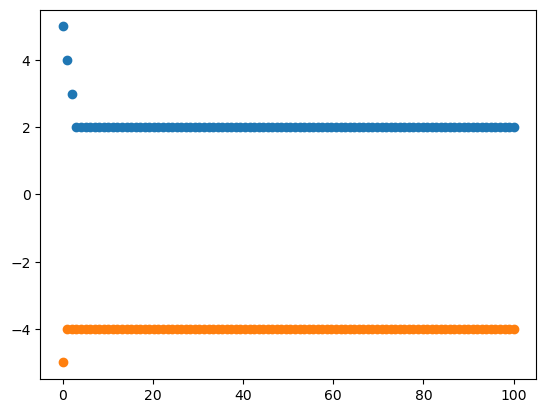

In [ ]:
### Insert your solution here ###
plt.scatter(np.linspace(0,max_iter,max_iter),centers_trajectory[0,:])
plt.scatter(np.linspace(0,max_iter,max_iter),centers_trajectory[1,:])

### Apply Mean-Shift to Segment an Image

Now, we can use the MS algorithm to segment an image. To do this, we will use the implementation of the [sklearn package](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) (you will soon see why). Here is what we will do:

1. Given the sharon image, we first apply k-means on pixel colors in two different spaces, RGB and LAB (use opencv for the color conversion). Since we have no idea how many clusters might be in the image, pick a guess (maybe counting the number of 'dominant' colors you can see)

2. Use the MS algorithm and tune its hyperparameters to achieve a reasonable result. 

3. How many colors does MS find in your image? If you fancy, repeat this with an image of your own choice and discuss the result.


In [ ]:
from sklearn.cluster import MeanShift
from sklearn import cluster 

In [ ]:
# Load the image and convert it to both RGB and LAB colour space; Visualise your results!
img = cv2.imread('sharon.jpg') # sharon


## Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
## Convert to LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

## Visualise the results


fig, axs = plt.subplots(1,2,figsize=(12,8))
axs[0].imshow(img_rgb, aspect='equal')
axs[1].imshow(img_lab, aspect='equal')

plt.show()


In [ ]:
# Run the k-means clustering algorithm from the 'cluster' package of 'sklearn' (imported above) on both images and visualise your results
img_rgb_flat = np.reshape(img_rgb, (-1,3)).astype(float)/255.0
img_lab_flat = np.reshape(img_lab, (-1,3)).astype(float)/255.0

n_clusters = 7

### Insert your solution here ###

#Fit RGB model 
kmeans_model_rgb = cluster.KMeans(n_clusters=n_clusters, verbose=0)
kmeans_model_rgb.fit(img_rgb_flat)


#Fit LAB model
kmeans_model_lab = cluster.KMeans(n_clusters=n_clusters, verbose=1)
kmeans_model_lab.fit(img_lab_flat)

#Apply necessary conversions and plot it
rgb_means_img = img_rgb.copy()/255.
for i,center in enumerate(kmeans_model_rgb.cluster_centers_):
    rgb_means_img[kmeans_model_rgb.labels_.reshape(img_rgb.shape[0],-1)==i] = center
lab_means_img = img_lab.copy()/255.
for i,center in enumerate(kmeans_model_lab.cluster_centers_):
    lab_means_img[kmeans_model_lab.labels_.reshape(img_lab.shape[0],-1)==i] = center

Initialization complete
Iteration 0, inertia 795.639261822383
Iteration 1, inertia 506.58161373695486
Iteration 2, inertia 500.44496736723244
Iteration 3, inertia 499.67227514326953
Iteration 4, inertia 499.4482893075388
Iteration 5, inertia 499.3781647753718
Iteration 6, inertia 499.3604334594033
Converged at iteration 6: center shift 1.7732077242371814e-06 within tolerance 3.067501362414432e-06.
Initialization complete
Iteration 0, inertia 834.0451364859707
Iteration 1, inertia 528.165427798801
Iteration 2, inertia 501.81906910291
Iteration 3, inertia 493.45089687570095
Iteration 4, inertia 488.9124581597209
Iteration 5, inertia 486.2710452316909
Iteration 6, inertia 484.4784770259352
Iteration 7, inertia 483.2219055399619
Iteration 8, inertia 482.3358320222462
Iteration 9, inertia 481.67810568846045
Iteration 10, inertia 481.1258302712418
Iteration 11, inertia 480.7580770797949
Iteration 12, inertia 480.5264897023365
Iteration 13, inertia 480.3632726580605
Iteration 14, inertia 480.

In [ ]:
plt.subplot(1,2,1)
plt.imshow(rgb_means_img)
plt.subplot(1,2,2)
plt.imshow(lab_means_img)

### Now, let's do Mean-Shift Clustering

Note that to speed up the process, we suggest you randomly select around 500 datapoints from the image and fit the model using this subset of datapoints. </br> You can then 'predict' the corresponding cluster centers (labels) for all other datapoints using this fitted MeanShift model. Remember you can look at the sklearn documentation for more information about the MeanShift() module </br>

In [ ]:
# MeanShift Clustering for RGB and LAB image

# We are setting a fixed seed here
np.random.seed(17)

num_rand_samples = 500 # Number of random samlpes -- Feel free to tune this if needed
h,w,c = img_rgb.shape

rnd_idx = np.random.choice(h*w,num_rand_samples)  # <-- Can be used to 'select' the datapoints from the (flattened) image via indexing

### Insert your solution here ###

#RGB model 
MS_model_rgb = MeanShift()
MS_model_rgb.fit(img_rgb_flat[rnd_idx])

#Lab model
MS_model_lab = MeanShift()
MS_model_lab.fit(img_lab_flat[rnd_idx])

#Apply necessary conversions and plot it
rgb_shift_img = img_rgb.copy()/255.
for i,center in enumerate(MS_model_rgb.cluster_centers_):
    rgb_shift_img[MS_model_rgb.predict(img_rgb_flat).reshape(img_rgb.shape[0],-1)==i] = center
lab_shift_img = img_lab.copy()/255.
for i,center in enumerate(MS_model_lab.cluster_centers_):
    lab_shift_img[MS_model_lab.predict(img_lab_flat).reshape(img_lab.shape[0],-1)==i] = center


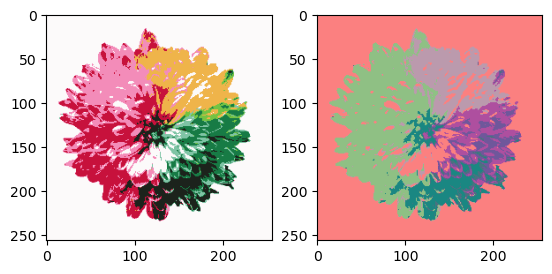

In [ ]:
plt.subplot(1,2,1)
plt.imshow(rgb_shift_img)
plt.subplot(1,2,2)
plt.imshow(lab_shift_img)

### Visualise them all!

Visualise all four resulting clustered images: k-Means RGB & LAB, as well as mean shift RGB & LAB. </br> _Hint_: Make sure to display all results in the RGB space (and convert appropriately).

(-0.5, 255.5, 255.5, -0.5)

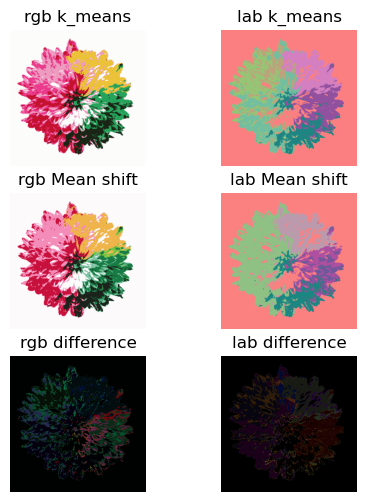

In [ ]:
# Visualising all cluster results
plt.figure(figsize=(5,6))
plt.subplot(3,2,1)
plt.title('rgb k_means')
plt.axis('off')
plt.imshow(rgb_means_img,aspect='equal')
plt.axis('off')
plt.subplot(3,2,2)
plt.title('lab k_means')
plt.imshow(lab_means_img,aspect='equal')
plt.axis('off')
plt.subplot(3,2,3)
plt.title('rgb Mean shift')
plt.imshow(rgb_shift_img,aspect='equal')
plt.axis('off')
plt.subplot(3,2,4)
plt.title('lab Mean shift')
plt.imshow(lab_shift_img,aspect='equal')
plt.axis('off')
plt.subplot(3,2,5)
plt.title('rgb difference')
plt.imshow(abs(rgb_shift_img - rgb_means_img),aspect='equal')
plt.axis('off')
plt.subplot(3,2,6)
plt.title('lab difference')
plt.imshow(abs(lab_shift_img - lab_means_img),aspect='equal')
plt.axis('off')


### Insert your solution here ###

<div class="alert alert-block alert-success">
    
    
    
#### What do you notice about the mean-shift algorithm compared to the k-means for the RGB and LAB images?
    
## if we pick k = 4 with the k-means algorithms, the final image would look vastly different, since the mean-shift algorithm would decide that the image should have 7 means. if we pick k = 7, as shown in the graph above, then the images would look very similar to the human eye, however we can still see that there is some difference that might not be very visible to us

</div>

<div class="alert alert-block alert-info">
    
## Tasks 6: Comparison between k-Means, k-Means++ Initialization and Mean-Shift algorithm.
    
In this task, you will visualize the effects of random initialization, k-Means++ initialization and the Mean Shift algorithm by plotting the final clustering result of all data points together with their **final** cluster centers (using 3D scatter plots, similar to Task 2). </br> For the two k-means methods, additionally plot their **initial** centroids!
    
    
</div>

In [ ]:
# We are setting a fixed seed here
np.random.seed(17)
k = 4
T = 20
img = cv2.cvtColor(cv2.imread('sharon.jpg'), cv2.COLOR_BGR2RGB)

#### Use random initialization to cluster the pixels of the *sharon.jpg* image.

In [ ]:
### Insert your solution here ###

# Randomly initialize the centroids and obtain the clustering results -- you can choose T=20 iterations to start with
C_random = random_centroids(img,k,unique = 1)
X_idx_random, C_new_random, _ ,_= mykMeans(img,C_random,T)


#### Use k-Means++ initialization to cluster the pixels of the *sharon.jpg* image. 

In [ ]:
### Insert your solution here ###

# Initialize the centroids via k-Means++ and obtain the clustering results -- you can choose T=20 iterations to start with
C_kmeanspp = kmeanspp_centroids(img,k)
X_idx_kmeanspp, C_new_kmeanspp, _ , _ = mykMeans(img,C_kmeanspp,T)

#### Use Mean Shift to cluster the pixels of the *sharon.jpg* image. 

In [ ]:
### Insert your solution here ###
img_flat = np.reshape(img, (-1,3)).astype(float)/255.0
# Apply the mean-shift algorithm to cluster the pixels of the sharon.jpg image
num_rand_samples = 500
h,w,c = img.shape
rnd_idx = np.random.choice(h*w,num_rand_samples)

# Fit ms model to subset to find clusters 
MS_kmeans = MeanShift()
MS_kmeans.fit(img_flat[rnd_idx])

# Get clusters and labels (see what MeanShift returns for its methods/attributes)
C_new_MeanShift = MS_kmeans.cluster_centers_
X_idx_MeanShift =  MS_kmeans.predict(img_lab_flat).reshape(img_lab.shape[0],-1)

Plot the generated centroids from each initialization method together with the final clustering result of the data points (by using corresponding centroid colours). You may want generate a side-by-side plot for easier comparison of the three methods (e.g. via subplots). Also make sure to clearly label your methods as well as axes in the plot.

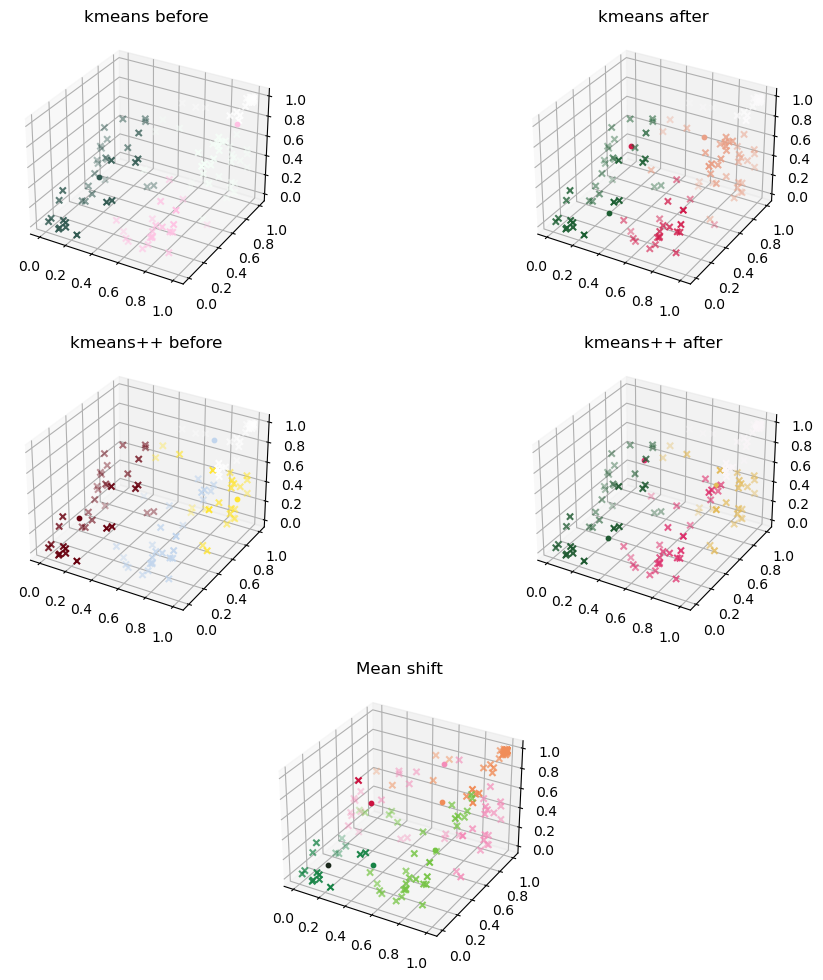

In [ ]:
# ### Insert your solution here ###
sample_idx = np.unravel_index(np.random.choice(np.prod(img.shape[0:-1]), size=250, replace=False), img.shape[0:-1])
sample_data = img[sample_idx]/255.
# # Create (sub)plot to display the final centroids and final cluster results obtained with Random Initialization, as well as the initial centroids
# ...


sampled_cluster_idx = X_idx_random[sample_idx]
centroids = C_random
#%matplotlib widget 
fig = plt.figure(figsize=(12, 12))
# Create 3D scatter plot with corresponding colours as first sub-plot
ax = fig.add_subplot(3, 2, 1, projection='3d')
plt.title('kmeans before')
for i,centroid in enumerate(centroids/255.):
    ax.scatter(centroid[0],centroid[1],centroid[2], color = (centroid[0],centroid[1],centroid[2]),s = 10)
    points = sample_data[sampled_cluster_idx ==i]
    ax.scatter(points[:,0],points[:,1],points[:,2], color = (centroid[0],centroid[1],centroid[2]),marker = 'x')

centroids = C_new_random
# Create 3D scatter plot with corresponding colours as first sub-plot
ax = fig.add_subplot(3, 2, 2, projection='3d')
plt.title('kmeans after')
for i,centroid in enumerate(centroids/255.):
    ax.scatter(centroid[1],centroid[0],centroid[2], color = (centroid[0],centroid[1],centroid[2]),s = 10)
    points = sample_data[sampled_cluster_idx ==i]
    ax.scatter(points[:,0],points[:,1],points[:,2], color = (centroid[0],centroid[1],centroid[2]),marker = 'x')


# # Create (sub)plot to display the final centroids and final cluster results obtained with k-Means++ Initialization, as well as the initial centroids
sampled_cluster_idx = X_idx_kmeanspp[sample_idx]
centroids = C_kmeanspp
# Create 3D scatter plot with corresponding colours as first sub-plot
ax = fig.add_subplot(3, 2, 3, projection='3d')
plt.title('kmeans++ before')
for i,centroid in enumerate(centroids/255.):
    ax.scatter(centroid[1],centroid[0],centroid[2], color = (centroid[0],centroid[1],centroid[2]),s = 10)
    points = sample_data[sampled_cluster_idx ==i]
    ax.scatter(points[:,0],points[:,1],points[:,2], color = (centroid[0],centroid[1],centroid[2]),marker = 'x')
centroids = C_new_kmeanspp
# Create 3D scatter plot with corresponding colours as first sub-plot
ax = fig.add_subplot(3, 2, 4, projection='3d')
plt.title('kmeans++ after')
for i,centroid in enumerate(centroids/255.):
    ax.scatter(centroid[1],centroid[0],centroid[2], color = (centroid[0],centroid[1],centroid[2]),s = 10)
    points = sample_data[sampled_cluster_idx ==i]
    ax.scatter(points[:,0],points[:,1],points[:,2], color = (centroid[0],centroid[1],centroid[2]),marker = 'x')



# # Create (sub)plot to display the final centroids and final cluster results obtained with the Mean Shift Algorithm
sampled_cluster_idx = X_idx_MeanShift[sample_idx]
centroids = C_new_MeanShift
# Create 3D scatter plot with corresponding colours as first sub-plot
ax = fig.add_subplot(3, 1, 3, projection='3d')
plt.title('Mean shift')
for i,centroid in enumerate(centroids):
    ax.scatter(centroid[1],centroid[0],centroid[2], color = (centroid[0],centroid[1],centroid[2]),s = 10)
    points = sample_data[sampled_cluster_idx ==i]
    ax.scatter(points[:,0],points[:,1],points[:,2], color = (centroid[0],centroid[1],centroid[2]),marker = 'x')

# # Display the results
# ...  

<div class="alert alert-block alert-success">
    
    
    
#### What do you notice about the mean-shift clustering compared to the k-means algorithms? And how do the two k-means initializations differ?
    
## As dicussed before, the two k-means algorithm differ at the initialisation where the kmeans++ satarts off with more unique colors, and centroids that are more spread apart comapred to the random k-means. mean shift algorithm helps determine the number of centroids that we should have given the data, which might not always be obvious with different types of data

</div>

Also observe the location of the initial centroids of random initialization and the K-means++ method!